# **Unsupervised Clustering of Frequently Asked Questions Using Sentence Transformers, KMeans and DBScan**

This project leverages Hugging Face's SentenceTransformer model (all-MiniLM-L6-v2) to encode text data from frequently asked questions (FAQs) into dense vector representations. The encoded data is clustered using KMeans, with the optimal number of clusters determined via the Elbow Method and Silhouette Score. The goal is to group semantically similar questions into distinct clusters for efficient categorization and retrieval. To classify new questions, the model predicts the cluster assignment based on proximity to cluster centroids, ensuring scalability for incoming queries.

This solution offers an efficient, unsupervised approach to organize and retrieve FAQs, enabling better user query handling.



In [46]:
import json

file_path = '/content/questions.json'

with open(file_path, 'r') as file:
    data = json.load(file)

print(data[1])

{'question_text': 'How many filters does JCI owe in their contract?', 'created_at': '2023-11-08 16:06:17.035+00', 'user_id': '64201228-e558-4722-962e-69c831e1ea8f'}


In [47]:
import pandas as pd

if isinstance(data, list):
    df = pd.DataFrame(data)
elif isinstance(data, dict):
    key = ['question_text', 'created_at', 'user_id']
    df = pd.DataFrame(data[key])
else:
    raise ValueError("Unsupported JSON structure")

print(df.head())

                                       question_text  \
0  What is the thickness of the drywall in the re...   
1   How many filters does JCI owe in their contract?   
2  what CB will the changes resulting from RFI 18...   
3         What's the flooring type in the penthouse?   
4  what CB will the changes resulting from RFI 18...   

                   created_at                               user_id  
0  2024-01-19 15:56:34.383+00  64201228-e558-4722-962e-69c831e1ea8f  
1  2023-11-08 16:06:17.035+00  64201228-e558-4722-962e-69c831e1ea8f  
2  2024-01-10 14:22:33.006+00  4f697825-9bb6-4fa6-b3ab-a46dc6d42919  
3  2024-01-10 20:55:19.668+00  fcad35ff-bb4b-435d-84f9-2f3b00c24f57  
4  2024-01-16 21:36:23.569+00  4f697825-9bb6-4fa6-b3ab-a46dc6d42919  


In [48]:
df_questions = df[['question_text']]
df_questions.head()

,question_text
0,What is the thickness of the drywall in the re...
1,How many filters does JCI owe in their contract?
2,what CB will the changes resulting from RFI 18...
3,What's the flooring type in the penthouse?
4,what CB will the changes resulting from RFI 18...


In [4]:
df_questions = df_questions.drop_duplicates(subset='question_text', keep='first')

In [49]:
df_questions.head()

,question_text
0,What is the thickness of the drywall in the re...
1,How many filters does JCI owe in their contract?
2,what CB will the changes resulting from RFI 18...
3,What's the flooring type in the penthouse?
4,what CB will the changes resulting from RFI 18...


In [6]:
questions = df_questions['question_text']

In [7]:
!pip install transformers sentence-transformers scikit-learn pandas

In [8]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

In [9]:
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [10]:
# Step 2: Generate embeddings for each question
embeddings = model.encode(questions.tolist(), show_progress_bar=True)

Batches:   0%|          | 0/17 [00:00<?, ?it/s]

In [11]:
# Step 3: Perform clustering (using KMeans as an example)
num_clusters = 5  # Set the desired number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(embeddings)
df_questions['cluster'] = kmeans.labels_

<ipython-input-11-65d36e866868>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_questions['cluster'] = kmeans.labels_


In [12]:
# Step 4: Analyze the clusters
for cluster_num in range(num_clusters):
    print(f"\nCluster {cluster_num}:")
    print(df_questions[df_questions['cluster'] == cluster_num]['question_text'].tolist())


Cluster 0:
['What is the thickness of the drywall in the residence? ', 'What is the thickness of the drywall in the ceiling of the residences?', 'Did we decide to thicken the utility pit wall? ', 'what is the mounting height for light fixture BX4', 'What is the pressure of the compressed air? ', 'Did we decide to thicken the utility pit wall?', 'what pre-pour inspection was for UM', 'what is the levelness tolerance for terrazzo floor', 'is drywall required under escalators?', 'are there mock ups required for interior glazing', 'what commissioning is required on the fireplace', 'What maintenance materials should be provided for ACT-13', 'what is the size of the Kooltherm insulated panels', 'What maintenance materials should be provided for ACT-12', 'Is metal fabrications specification section design-build?', 'What maintenance materials should be provided for ACT-8', 'What is the current status of observation #2629: Patch drywall', 'Elaborate on what rigging requirements are included on

**Store Cluster Centers and Embeddings**

In [38]:
cluster_centers = kmeans.cluster_centers_

**Encode New Questions and Classify**

In [39]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def classify_question(new_question, model, kmeans):
    # Step 1: Encode the new question
    new_embedding = model.encode([new_question])

    # Step 2: Assign the question to the nearest cluster
    assigned_cluster = kmeans.predict(new_embedding)[0]
    return assigned_cluster

**Retrieve Similar Questions**

In [40]:
def retrieve_similar_questions(new_question, df_questions, model, kmeans, top_k=5):
    # Step 1: Classify the question into a cluster
    assigned_cluster = classify_question(new_question, model, kmeans)

    # Step 2: Filter questions from the same cluster
    cluster_questions = df_questions[df_questions['cluster'] == assigned_cluster]['question_text'].tolist()

    # Step 3: Compute similarity within the cluster
    cluster_embeddings = embeddings[df_questions['cluster'] == assigned_cluster]
    new_embedding = model.encode([new_question])
    similarities = cosine_similarity(new_embedding, cluster_embeddings).flatten()

    # Step 4: Retrieve the top-k most similar questions
    top_k_indices = np.argsort(similarities)[::-1][:top_k]
    similar_questions = [cluster_questions[i] for i in top_k_indices]

    return assigned_cluster, similar_questions


**Classification and Retrieval Workflow**

In [41]:
def classify_and_retrieve(new_question, df_questions, model, kmeans, top_k=5):
    # Classify the new question
    assigned_cluster, similar_questions = retrieve_similar_questions(new_question, df_questions, model, kmeans, top_k)

    return {
        "assigned_cluster": assigned_cluster,
        "similar_questions": similar_questions
    }

**Let's try an example question**

In [42]:
# Define the new question
new_question = "What is the thickness of the window?"

# Classify and retrieve similar questions
result = classify_and_retrieve(new_question, df_questions, model, kmeans, top_k=5)

print("Assigned Cluster:", result["assigned_cluster"])
print("Similar Questions:", result["similar_questions"])


Assigned Cluster: 5
Similar Questions: ['what is the thickness of drywall?', 'What is the thickness of the drywall in the residence? ', 'How thick is the drywall in the residence? ', 'What is the drywall thickness in the residences?', 'What is the thickness of the drywall in the ceiling of the residences?']


# **Finetuning the Clusters**

**Elbow Method**

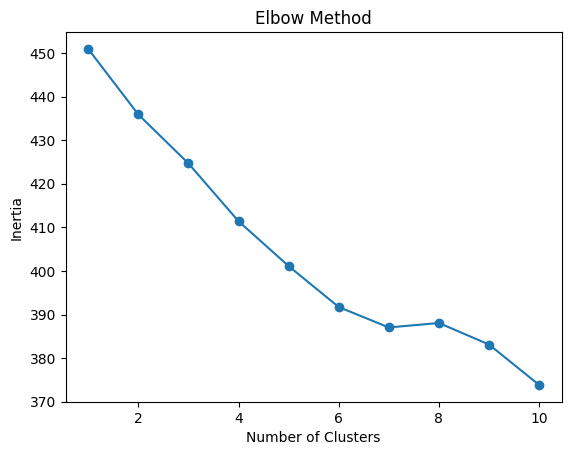

In [33]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def find_optimal_clusters(embeddings, max_clusters=10):
    inertia = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(embeddings)
        inertia.append(kmeans.inertia_)

    plt.plot(range(1, max_clusters + 1), inertia, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')
    plt.show()

find_optimal_clusters(embeddings)

**Silhoette Score**

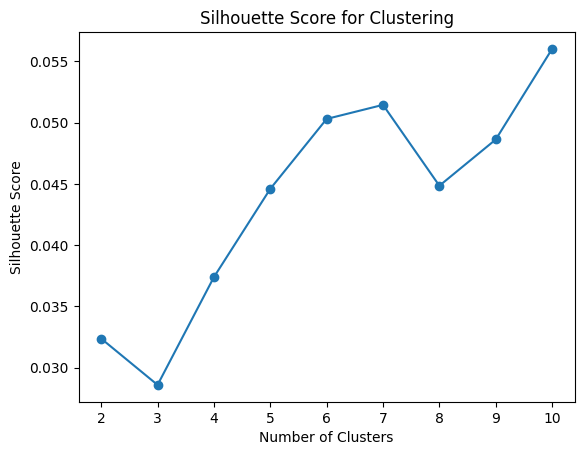

In [34]:
from sklearn.metrics import silhouette_score

def evaluate_clusters(embeddings, max_clusters=10):
    silhouette_scores = []
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(embeddings)
        score = silhouette_score(embeddings, labels)
        silhouette_scores.append(score)

    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score for Clustering')
    plt.show()

evaluate_clusters(embeddings)

Choosing the kneepoint in the elobow method and the highest silhoette score, 7 looks like a good number of clusters

**Lets normalize the embeddings so that clustering can be done on consistent distances**

In [36]:
from sklearn.preprocessing import normalize

num_clusters = 7

normalized_embeddings = normalize(embeddings)
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(normalized_embeddings)
df_questions['cluster'] = kmeans.labels_

<ipython-input-36-fd512b7a94f3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_questions['cluster'] = kmeans.labels_


In [37]:
for cluster_num in range(num_clusters):
    print(f"\nCluster {cluster_num}:")
    print(df_questions[df_questions['cluster'] == cluster_num]['question_text'].tolist())


Cluster 0:
['Did we decide to thicken the utility pit wall? ', 'what material is CT-4', 'Did we decide to thicken the utility pit wall?', 'which architectural detail shows the water feature', 'what is the levelness tolerance for terrazzo floor', 'are there mock ups required for interior glazing', 'What are the concrete mix designs?', 'What maintenance materials should be provided for ACT-13', 'What maintenance materials should be provided for ACT-12', 'Is metal fabrications specification section design-build?', 'What maintenance materials should be provided for ACT-8', 'What is the current status of observation #2629: Patch drywall', 'Elaborate on what rigging requirements are included on the project', 'Do that interior side of rated shaft walls require taping?', 'what are level 5 finish requirements for drywall ceilings?', 'Do louvers need to be caulked? ', 'Do all drywall penetrations need to be sealed? ', 'IS there anything in the specifications that would require existing lights t

# **Using DBScan now**

In [36]:
from sklearn.cluster import DBSCAN

In [37]:
eps = 0.5  # Maximum distance between points to be considered in the same neighborhood
min_samples = 5  # Minimum points to form a dense cluster
dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='cosine')
clusters = dbscan.fit_predict(embeddings)

In [38]:
df_questions['cluster'] = clusters

<ipython-input-38-b6c71613d9f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_questions['cluster'] = clusters


In [40]:
# Analyze clusters
print(df_questions['cluster'].value_counts())  # View cluster sizes
for cluster in set(clusters):
    print(f"\nCluster {cluster}:")
    print(df_questions[df_questions['cluster'] == cluster]['question_text'].tolist())

cluster
 2    219
-1    213
 1     28
 3     25
 0     10
 8      8
 4      8
 5      5
 7      4
 6      3
Name: count, dtype: int64

Cluster 0:
['What is the thickness of the drywall in the residence? ', 'What is the thickness of the drywall in the ceiling of the residences?', 'what are level 5 finish requirements for drywall ceilings?', 'How thick is the drywall in the residence? ', 'How thick is Drywall at the residence?', 'what are level 5 finish requirements for drywall ceilings', 'what is the thickness of drywall?', 'What is the drywall thickness in the residences?', 'What is the drywall thickness of the ceiling in the residences?', 'What is the thickness of the crane pad']

Cluster 1:
['what CB will the changes resulting from RFI 1824 be captured in ', 'what CB will the changes resulting from RFI 1824 be captured in', 'What CB will the updates from RFI #1838 be captured in?', "what rfi's were submitted in the month of September", 'what is the status of RFI #1837', 'what is the 

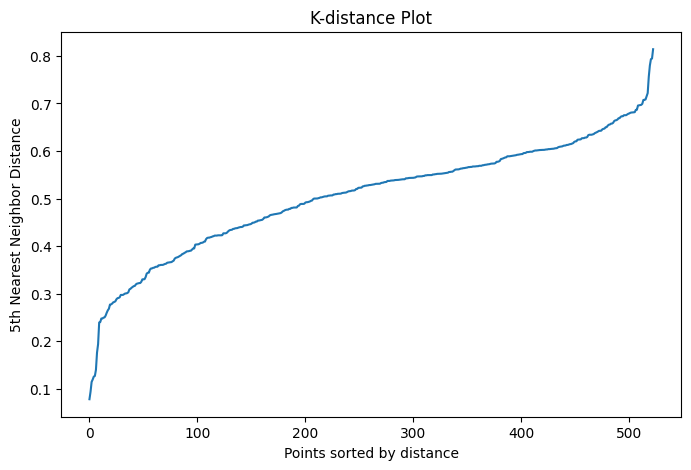

In [43]:
# Fine tuning
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Find the nearest neighbors
neighbors = NearestNeighbors(n_neighbors=5, metric='cosine')  # Use same metric as DBSCAN
neighbors_fit = neighbors.fit(embeddings)
distances, indices = neighbors.kneighbors(embeddings)

# Sort distances for the kth neighbor
distances = np.sort(distances[:, 4], axis=0)  # 4 corresponds to k=5
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.title('K-distance Plot')
plt.xlabel('Points sorted by distance')
plt.ylabel('5th Nearest Neighbor Distance')
plt.show()


# Try a Range of parameters

In [44]:
from sklearn.cluster import DBSCAN
import pandas as pd

# Test different parameter combinations
for eps in [0.2, 0.25, 0.3, 0.4, 0.5, 0.6]:
    for min_samples in [3, 4, 5, 6, 7, 8, 9, 10]:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='cosine')
        clusters = dbscan.fit_predict(embeddings)

        # Analyze the clustering result
        num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)  # Exclude noise (-1)
        num_noise = list(clusters).count(-1)
        print(f"eps={eps}, min_samples={min_samples}: {num_clusters} clusters, {num_noise} noise points")

eps=0.2, min_samples=3: 16 clusters, 461 noise points
eps=0.2, min_samples=4: 5 clusters, 497 noise points
eps=0.2, min_samples=5: 3 clusters, 505 noise points
eps=0.2, min_samples=6: 2 clusters, 510 noise points
eps=0.2, min_samples=7: 1 clusters, 516 noise points
eps=0.2, min_samples=8: 0 clusters, 523 noise points
eps=0.2, min_samples=9: 0 clusters, 523 noise points
eps=0.2, min_samples=10: 0 clusters, 523 noise points
eps=0.25, min_samples=3: 21 clusters, 433 noise points
eps=0.25, min_samples=4: 8 clusters, 479 noise points
eps=0.25, min_samples=5: 5 clusters, 494 noise points
eps=0.25, min_samples=6: 2 clusters, 509 noise points
eps=0.25, min_samples=7: 2 clusters, 509 noise points
eps=0.25, min_samples=8: 0 clusters, 523 noise points
eps=0.25, min_samples=9: 0 clusters, 523 noise points
eps=0.25, min_samples=10: 0 clusters, 523 noise points
eps=0.3, min_samples=3: 29 clusters, 379 noise points
eps=0.3, min_samples=4: 12 clusters, 435 noise points
eps=0.3, min_samples=5: 9 cluste

In [89]:
eps=0.5
min_samples=5

In [90]:
dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='cosine')
clusters = dbscan.fit_predict(embeddings)

In [91]:
df_questions['cluster'] = clusters

<ipython-input-91-b6c71613d9f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_questions['cluster'] = clusters


In [92]:
print(df_questions['cluster'].value_counts())  # View cluster sizes
for cluster in set(clusters):
    print(f"\nCluster {cluster}:")
    print(df_questions[df_questions['cluster'] == cluster]['question_text'].tolist())

cluster
 2    219
-1    213
 1     28
 3     25
 0     10
 8      8
 4      8
 5      5
 7      4
 6      3
Name: count, dtype: int64

Cluster 0:
['What is the thickness of the drywall in the residence? ', 'What is the thickness of the drywall in the ceiling of the residences?', 'what are level 5 finish requirements for drywall ceilings?', 'How thick is the drywall in the residence? ', 'How thick is Drywall at the residence?', 'what are level 5 finish requirements for drywall ceilings', 'what is the thickness of drywall?', 'What is the drywall thickness in the residences?', 'What is the drywall thickness of the ceiling in the residences?', 'What is the thickness of the crane pad']

Cluster 1:
['what CB will the changes resulting from RFI 1824 be captured in ', 'what CB will the changes resulting from RFI 1824 be captured in', 'What CB will the updates from RFI #1838 be captured in?', "what rfi's were submitted in the month of September", 'what is the status of RFI #1837', 'what is the 

In [46]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.5 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


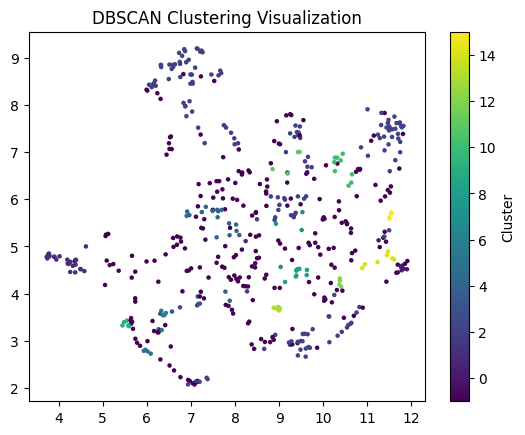

In [76]:
import matplotlib.pyplot as plt
from umap import UMAP

# Reduce dimensions for visualization
umap = UMAP(n_neighbors=15, min_dist=0.1, metric='cosine', random_state=42)
reduced_embeddings = umap.fit_transform(embeddings)

# Scatter plot with cluster labels
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=clusters, cmap='viridis', s=5)
plt.colorbar(label='Cluster')
plt.title('DBSCAN Clustering Visualization')
plt.show()

Cosine Similarity

In [ ]:
from sentence_transformers import SentenceTransformer, util

# Load a pre-trained sentence transformer
model = SentenceTransformer('all-MiniLM-L6-v2')

# Example sentences
sentences = ["What is AI?", "Explain artificial intelligence.", "What is machine learning?"]

# Generate embeddings
embeddings = model.encode(sentences, convert_to_tensor=True)

# Calculate similarity matrix
cosine_scores = util.pytorch_cos_sim(embeddings, embeddings)

# Print similarity scores
print("Cosine Similarity Matrix:")
print(cosine_scores)

# Evaluate against a benchmark dataset (STS-B)
from sentence_transformers import evaluation
evaluator = evaluation.EmbeddingSimilarityEvaluator.from_input_examples(your_sts_data, name='sts-test')
model.evaluate(evaluator)
